# Question 1 - Multinomial logistic regression and cross validation (6 points)

Multinomial logistic regression and cross validation (6 points). For this problem, you will estimate the probability that a given wine comes from a given cultivar. The data in the file strongdrink.txt (taken from the UCI Machine Learning Repository) are the results of a chemical analysis of 176 Italian wines from three known cultivars (a cultivar is a group of grapes selected for desirable characteristics that can be maintained by propagation). The chemical analysis determined the quantities of the following 13 different constituents (the last 13 variables):

In [12]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics import confusion_matrix


In [13]:
wine=pd.read_csv('data/strongdrink.txt')
print (wine.shape)
wine.head()

(176, 14)


,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## a) 
Use a multinomial logistic regression model of the following form with the following linear predictor $n_j$ for j = 1, 2 (the baseline class is j = 3).

$Pr(cultivar_i =j|X\beta_j)=\frac{e^{n_j}}{1+\sum_{j=1}^{J-1}e^{n_j}}$ for j=1,2
where $n_j = \beta_{j,0} + \beta_{j,1}alco_i + \beta_{j,2}malic_i + \beta_{j,3}totphen_i + \beta_{j,4}colorint_i$

Estimate the model on a 75% sample training set using the following command. Report your two sets of estimated coefficients and intercepts for j = 1 and j = 2 (not the coefficients for j = 3). Report your error rates (1 - precision) on the test set using the code below. Which category(ies) of cultivar is the model best at predicting? Is (are) the most accurately predicted category(ies) the one(s) with the most observations? Report the MSE from the test set.

#### Answer

The error rate for Cultivars 1, 2, and 3 is $0.13$, $0.0$ and $0.0$, respectively. The most accurately predicted category of Cultivar (100% precision and recall) is #3 , which is the category with the lowest number of observations in the original data, training set and test set. The Cultivars are labeled 1, 2 and 3, but those values do not describe their relation with one another (i.e the difference between Cultivar 1 and Cultivar 2 is the same as the difference between Cultivar 1 and Cultivar 3), so calculating the MSE by using $\sum(y_{test} - y_{prediction})^2$ would not give an accurate description of the error. If we describe the MSE as the number of incorrect predictions divided by total predictions, it is $0.04545$

In [14]:
#Split data
X = wine[['alco','malic','tot_phen','color_int']]
y = wine['cultivar']

In [15]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.25,
       random_state=20)

#Count number of each cultivar in test set

print('Number of each Cultivar in original data:' ,np.unique(y, return_counts=True))
print('Number of each Cultivar in test data:' ,np.unique(y_train, return_counts=True))
print('Number of each Cultivar in test data:' ,np.unique(y_test, return_counts=True))


Number of each Cultivar in original data: (array([1, 2, 3]), array([59, 71, 46]))
Number of each Cultivar in test data: (array([1, 2, 3]), array([46, 50, 36]))
Number of each Cultivar in test data: (array([1, 2, 3]), array([13, 21, 10]))


In [16]:
LogReg = LogisticRegression(random_state=0, multi_class='multinomial',solver='newton-cg')
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

print('The coefficients for Cultivar 1 are:', LogReg.coef_[1])
print('The coefficients for Cultivar 2 are:', LogReg.coef_[2])

The coefficients for Cultivar 1 are: [-1.46798523 -0.33305092  0.66400603 -0.92270882]
The coefficients for Cultivar 2 are: [-0.2324475   0.59866064 -1.8879004   0.89996106]


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13  0  0]
 [ 2 19  0]
 [ 0  0 10]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



In [19]:
print('Cultivar 1 error rate = 0.13')
print('Cultivar 2 error rate = 0.0')
print('Cultivar 3 error rate = 0.0')

Cultivar 1 error rate = 0.13
Cultivar 2 error rate = 0.0
Cultivar 3 error rate = 0.0


In [20]:
#Because the 
mse_test = np.sum(y_test != y_pred)/(y_pred.shape[0])

print('The MSE from the test is:', mse_test)

The MSE from the test is: 0.045454545454545456


## b) 
Perform a leave-one-out cross validation (LOOCV) with the model from part (a). Report your error rates (1 - precision) for each category? How do your error rates compare to those from part (a)? Report your LOOCV estimate for the test MSE as the average MSE, where $y_i$ is the left out observation from each test set.

$CV_{loo} = \frac{1}{N}\sum_{i=1}^{N}[1-I(y_i = \hat{y_i})]$

#### Answer
The error rate for Cultivars 1, 2, and 3 is  $0.10$,  $0.09$  and  $0.04$, respectively. With respect to part (a), the error rate is lower for Cultivar 1 and higher for Cultivars 2 and 3. When taking into account both precision and recall, the loocv model also best predicts wines that are Cultivar 3. The MSE for the test set is $0.07955$

In [21]:
Xvals = X.values
yvals = y.values
N_loo = Xvals.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvals)

y_test_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvals):
    X_trainb, X_testb = Xvals[train_index], Xvals[test_index]
    y_trainb, y_testb = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(random_state=0, multi_class='multinomial',solver='newton-cg')
    LogReg.fit(X_trainb, y_trainb)
    y_predb = LogReg.predict(X_testb)
    y_test_vec[test_index]=y_testb
    y_pred_vec[test_index]=y_predb


mse_test_loo = np.sum(y_test_vec != y_pred_vec)/(y_pred_vec.shape[0])

print('test estimate MSE loocv=', mse_test_loo)


test estimate MSE loocv= 0.07954545454545454


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrixloo = confusion_matrix(y_test_vec, y_pred_vec)
confusion_matrixloo

array([[55,  4,  0],
       [ 5, 64,  2],
       [ 1,  2, 43]])

In [23]:
print(classification_report(y_test_vec, y_pred_vec))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.92      0.92      0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



### c) 
Perform a k-fold cross validation in which the data are divided into k = 4 groups. Use the following code. Report your error rates (1 - precision) for each category. How do your error rates compare to those from parts (a) and (b)? Report your k-fold estimate for the test MSE as the average MSE.

#### Answer
The error rate for Cultivars 1, 2, and 3 is  $0.13$,  $0.09$  and  $0.04$, respectively. With respect to part (a), the error rate is lower for Cultivar 1 and higher for Cultivars 2 and 3. With respect to part (b), the error rate is higher or Cultivar 1 and the same for Cultivars 2 and 3. When taking into account both precision and recall, the k-fold model also best predicts wines that are Cultivar 3. The MSE for the test set is $0.09091$, higher than the models in part (a) and (b).

In [24]:
k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(Xvals)

y_test_veck = np.zeros(N_loo)
y_pred_veck = np.zeros(N_loo)

k_ind = int(0)

for train_index, test_index in kf.split(Xvals):
    X_traink, X_testk = Xvals[train_index], Xvals[test_index]
    y_traink, y_testk = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(random_state=0, multi_class='multinomial',solver='newton-cg')
    LogReg.fit(X_traink, y_traink)
    y_predk = LogReg.predict(X_testk)
    y_test_veck[test_index] = y_testk
    y_pred_veck[test_index] = y_predk
    
    # print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

mse_test_k = np.sum(y_test_veck != y_pred_veck)/(y_pred_veck.shape[0])

print('test estimate MSE k-fold =', mse_test_k)

test estimate MSE k-fold = 0.09090909090909091


In [25]:
confusion_matrixk = confusion_matrix(y_test_veck, y_pred_veck)
confusion_matrixk

array([[55,  4,  0],
       [ 7, 62,  2],
       [ 1,  2, 43]])

In [26]:
print(classification_report(y_test_veck, y_pred_veck))

              precision    recall  f1-score   support

         1.0       0.87      0.93      0.90        59
         2.0       0.91      0.87      0.89        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.91      0.91      0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



# Question 2 - Splines and interpolation (4 points)

A survey was conducted in the year 2019 in which a group of 20 American high school students ranked a representative sample of individuals according to coolness that could range from 0 to 100. The result was an aggregated score for each individual. They called this the Coolness Index. The data are in the comma-delimited data file CoolIndex.txt, where each row represents an individual in the sample (N = 956), the first column is the age of the individual, and the second column is the corresponding aggregated Coolness Index value.

In [27]:
cool = np.loadtxt('data/CoolIndex.txt',delimiter=",")
print(cool.shape)

(956, 2)


### a) 
Create a scatterplot of the data with age on the x-axis and Coolness Index on the y-axis. Label your axes, and give the plot a title.

Text(0, 0.5, 'Coolness')

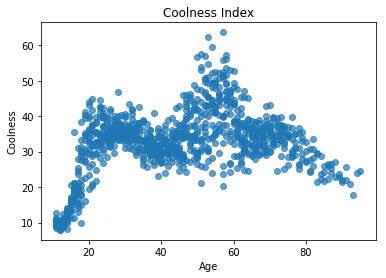

In [28]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.scatter(cool[:,0], cool[:,1], alpha=0.7)
plt.title('Coolness Index')
plt.xlabel('Age')
plt.ylabel('Coolness')

### b) 
Use ordinary least squares (OLS) regression to fit a stepwise function to these data. Use 5 bins [11, 22), [22, 40), [40, 59), [59, 77), [77, 95]. Remember that your dummy variables must be integer type (0, 1), not boolean type (True, False). Plot this step function on top of the scatterplot of the data from part (a). Label your axes, include a legend, and give the plot a title. Report your estimated step function values for each bin
[$\beta_1, \beta_2, \beta_3, \beta_4, \beta_5$]. What is the predicted coolness of a 73-year old from the stepwise function?

#### Answer
The predicted coolness of a 73-year old from the stepwise function is $35.2254$

In [29]:
cool_df = pd.DataFrame(cool, columns=('Age','Coolness'))

bins = [11,22,40,59,77,100]
bin_names=['1','2','3','4','5']

cool_df['Bin'] = pd.cut(cool_df['Age'],bins, right=False, labels=bin_names)

In [30]:
cool_df_reg = pd.get_dummies(cool_df,columns=['Bin'])
cool_df_reg.head()

,Age,Coolness,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5
0,11.0,10.981602,1,0,0,0,0
1,11.0,11.364925,1,0,0,0,0
2,11.0,10.190227,1,0,0,0,0
3,11.0,9.903725,1,0,0,0,0
4,11.0,8.997918,1,0,0,0,0


In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

coolreg = smf.ols(formula='Coolness ~ Bin_2+ Bin_3+ Bin_4+Bin_5',
              data=cool_df_reg).fit()
coolreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          3.73e-114
Time:                        02:26:02   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.1025      0.562     35.746      0.000      18.999      21.206
Bin_2         14.3733      0.708     20.287      0.000      12.983      15.764
Bin_3         17.5326      0.704     24.899      0.000      16.151      18.915
Bin_4         15.1229      0.743     20.356      0.000      13.665      16.581
Bin_5          7.1939      1.092      6.590      0.000       5.052       9.336
==============================================================================
Omnibus:                       80.102   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.718
Skew:                           0.714   Prob(JB):                     8.17e-23
Kurtosis:                       3.719   Cond. No.                         6.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
Age11 = coolreg.params[0]
Age22 = coolreg.params[0] + coolreg.params[1]
Age40 = coolreg.params[0] + coolreg.params[2]
Age59 = coolreg.params[0] + coolreg.params[3]
Age77 = coolreg.params[0] + coolreg.params[4]

def add_step(x):
    if x == '1':
        return float(Age11)
    elif x == '2':
        return float(Age22)
    elif x == '3':
        return float(Age40)
    elif x == '4':
        return float(Age59)
    else:
        return float(Age77)

In [34]:
cool_df['Step']= cool_df['Bin'].apply(add_step)

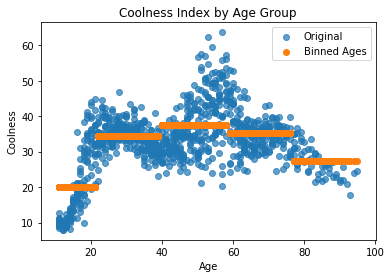

In [35]:
plt.scatter(cool[:,0], cool[:,1], alpha=0.7, label='Original')
plt.title('Coolness Index by Age Group')
plt.xlabel('Age')
plt.ylabel('Coolness')
plt.scatter('Age','Step',data=cool_df, label='Binned Ages')
plt.legend()

In [36]:
print('Coolness at 73 from OLS Stepwise = ',
      cool_df.loc[cool_df['Bin'] == str(int(np.digitize(73,bins))),'Step'][1])

Coolness at 73 from OLS Stepwise =  35.22540004024273


### c) 
Fit a linear spline (continuous) to the data over the 5 age bins from part (b). Use the scipy.interpolate.LSQUnivariateSpline function with k = 1 (linear) and the knots equal to t =[22,40,59,77]. Plot your continuous linear spline against a scatterplot of the data from part (a) and the estimated step function from part (b). Label your axes, include a legend, and give the plot a title. What is the predicted coolness of a 73-year old from the linear spline?

#### Answer

The predicted coolness of a 73-year old from the linear spline is $33.3241$

In [37]:
from scipy.interpolate import LSQUnivariateSpline, UnivariateSpline
import scipy.interpolate as si

cool_func = si.interp1d(cool_df['Age'], cool_df['Coolness'])
age_pts = np.linspace(cool_df['Age'].min(), cool_df['Age'].max(), 1000)
cool_pts = cool_func(age_pts)

t = [22,40,59,77]
spl = LSQUnivariateSpline(age_pts, cool_pts, t,k=1)

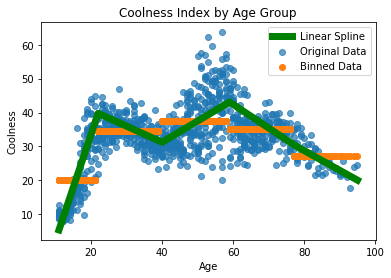

In [38]:
plt.scatter('Age','Coolness',data=cool_df, alpha=0.7, label='Original Data')
plt.scatter('Age','Step',data=cool_df, label='Binned Data')
plt.plot(age_pts, spl(age_pts), 'g', lw=7, label = "Linear Spline")

plt.title('Coolness Index by Age Group')
plt.xlabel('Age')
plt.ylabel('Coolness')
plt.legend()

In [40]:
#Coolness at 73
cool73_lin = np.interp(73, age_pts, spl(age_pts))
print('Coolness at 73 from Linear Spline = ',cool73_lin)

Coolness at 73 from Linear Spline =  33.324132239493906


### d)
Fit a cubic spline (continuous) to the data over the 5 age bins from part (b). Use the scipy.interpolate.LSQUnivariateSpline function with k = 3 (cubic) and the knots equal to t = [22,40,59,77]. Plot your continuous cubic spline against a scatterplot of the data from part (a) and the estimated step function from part (b), and the linear spline from part (c). Label your axes, include a legend, and give the plot a title. What is the predicted coolness of a 73-year old from the cubic spline?

#### Answer

The predicted coolness of a 73-year old from the cubic spline is $32.8368$

In [41]:
spl2 = LSQUnivariateSpline(age_pts, cool_pts, t,k=3)

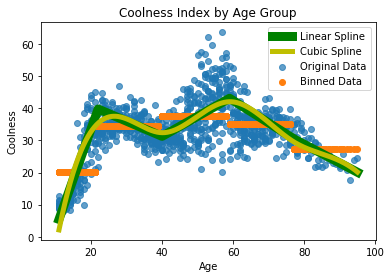

In [42]:
plt.scatter('Age','Coolness',data=cool_df, alpha=0.7, label='Original Data')
plt.scatter('Age','Step',data=cool_df, label='Binned Data')
plt.plot(age_pts, spl(age_pts), 'g', lw=9, label = "Linear Spline")
plt.plot(age_pts, spl2(age_pts), 'y', lw=5, label = "Cubic Spline")

plt.title('Coolness Index by Age Group')
plt.xlabel('Age')
plt.ylabel('Coolness')
plt.legend()

In [43]:
#Coolness at 73
cool73_cub = np.interp(73, age_pts, spl2(age_pts))
print('Coolness at 73 from Cubic Spline = ',cool73_cub)

Coolness at 73 from Cubic Spline =  32.836794846349704
